In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper functions

In [8]:
from PIL import Image
import os
import pandas as pd
import pylab as pl
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D # needed to modify the way figure behaves

In [3]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

## Load data

In [20]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [13]:
X = pd.DataFrame([im.histogram() for im in images])


## Part 1

In [17]:
#print("Computing PCA projection..."),
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)
#print("done.")

print(pca.explained_variance_ratio_)

[ 0.24632315  0.10808704]


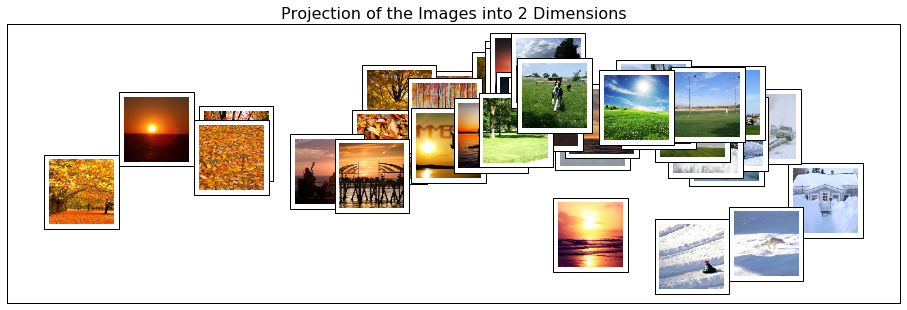

In [18]:
plot_image_space(images,X_pca)

# Part 2

What does it mean for two images to be close together in this plot? What does it mean for two images to be far apart?

A: Two images are close together means they are clustered as a same season. When two images are far apart, it means they are the most different reasons. 


Do images corresponding to one of the seasons tend to group together more closely than others? Why might this be the case?

A:
Yes, images corresponding to one of the seasons are grouped together more closely since their 
colors are close. For example, couple snow pictures are grouped together at the right conner. 

# Part 3

Repeat this process using a different data reduction method and describe any similarities/differences between that experiment when compared to applying PCA.

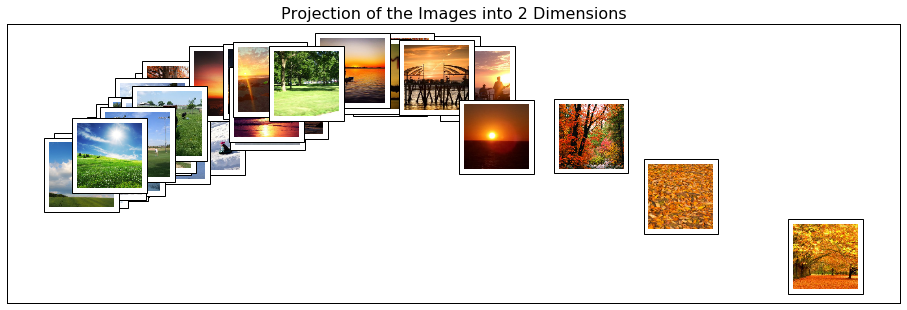

In [40]:
# Compute (two-dimensional) LLE on the digits dataset

#print("Computing LLE..."),
clf = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard')
X_lle = clf.fit_transform(X)
#print("done. Reconstruction error: %g" % clf.reconstruction_error_)

# Plot LLE result
plot_image_space(images,X_lle)

In [44]:
img_dir2 = os.path.join(os.getcwd(), "testImages") # directory path
images2 = load_images(img_dir2) # load images in the specified directory
X2 = pd.DataFrame([im.histogram() for im in images2])

In [45]:
#print("Computing PCA projection..."),
pca2 = decomposition.PCA(n_components=2)
X_pca2 = pca.fit_transform(X2)

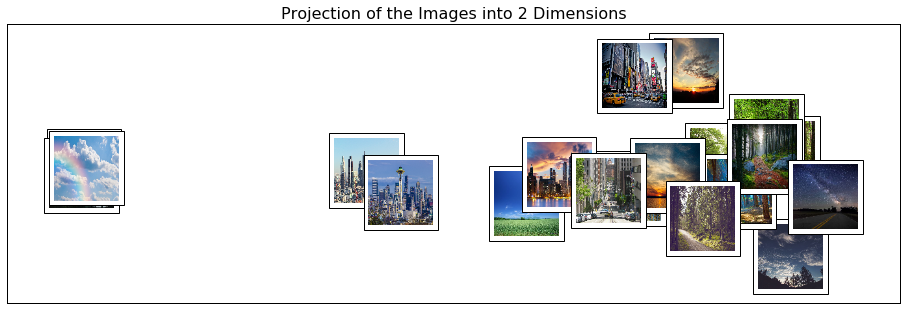

In [46]:
plot_image_space(images2,X_pca2)

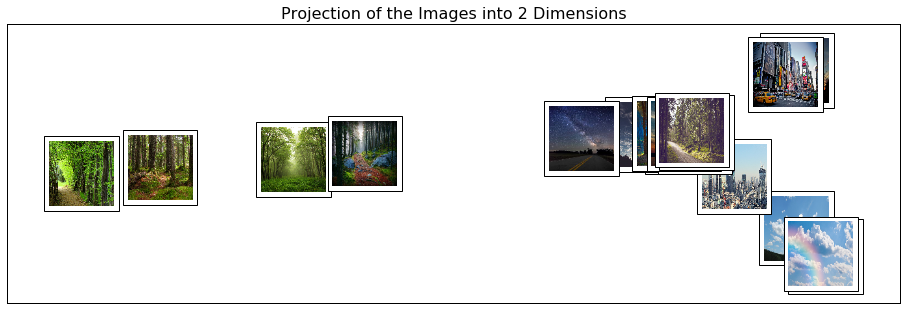

In [49]:
#print("Computing LLE..."),
clf2 = manifold.LocallyLinearEmbedding(n_neighbors=7, n_components=2, method='standard')
X_lle2 = clf.fit_transform(X2)
#print("done. Reconstruction error: %g" % clf.reconstruction_error_)

# Plot LLE result
plot_image_space(images2,X_lle2)